# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

weather_api_key= "27251649412918cf017bc9e373335f1d"
 
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | kourou
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | vilyuchinsk
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | governador valadares
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | bartolome maso
City not found. Skipping...
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | el porvenir
Processing Record 14 of Set 1 | marquette
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | ambalavao
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | yuzhno-kurilsk
Processing Record 20 of Set 1 | cannonvale
Processing Record 21 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,18.58,91,100,3.60,US,1723167434
1,kourou,5.1552,-52.6478,25.51,88,54,3.27,GF,1723167435
2,grytviken,-54.2811,-36.5092,-15.39,76,15,6.24,GS,1723167436
3,vilyuchinsk,52.9306,158.4028,13.44,99,100,1.15,RU,1723167437
4,guerrero negro,27.9769,-114.0611,22.69,67,0,7.09,MX,1723167440


In [6]:
# Import necessary library
import os

# Create the output_data directory
os.makedirs("output_data", exist_ok=True)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,18.58,91,100,3.60,US,1723167434
1,kourou,5.1552,-52.6478,25.51,88,54,3.27,GF,1723167435
2,grytviken,-54.2811,-36.5092,-15.39,76,15,6.24,GS,1723167436
3,vilyuchinsk,52.9306,158.4028,13.44,99,100,1.15,RU,1723167437
4,guerrero negro,27.9769,-114.0611,22.69,67,0,7.09,MX,1723167440


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

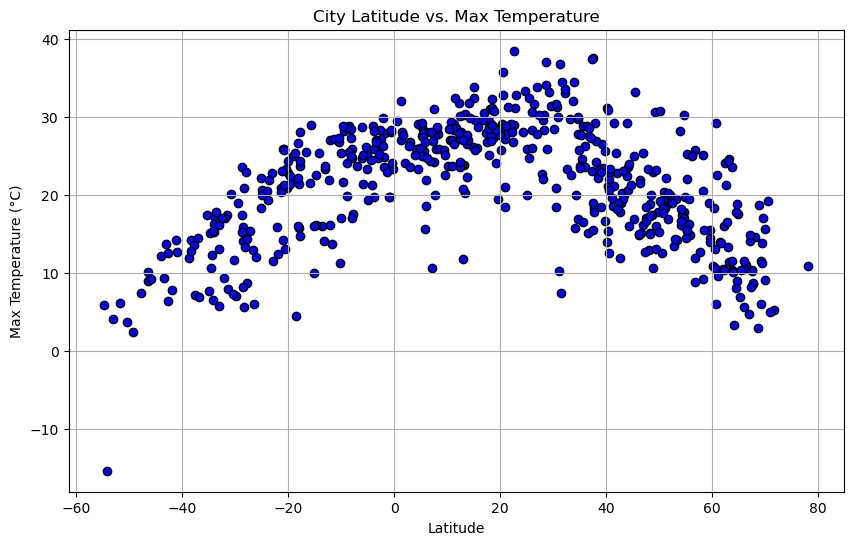

In [8]:
import matplotlib.pyplot as plt

# data
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, temperature, marker='o', color='blue', edgecolor='black')

# Incorporate other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

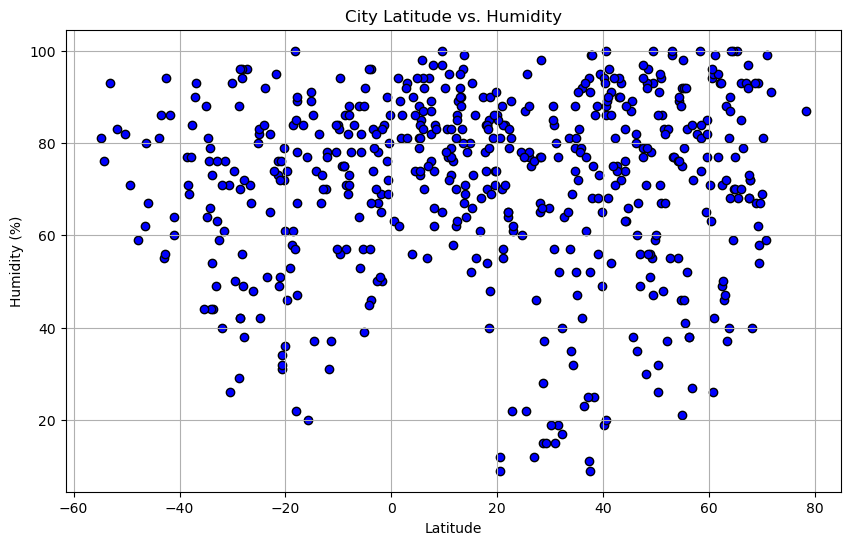

In [9]:
# Prepare data
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, humidity, marker='o', color='blue', edgecolor='black')

# Incorporate other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

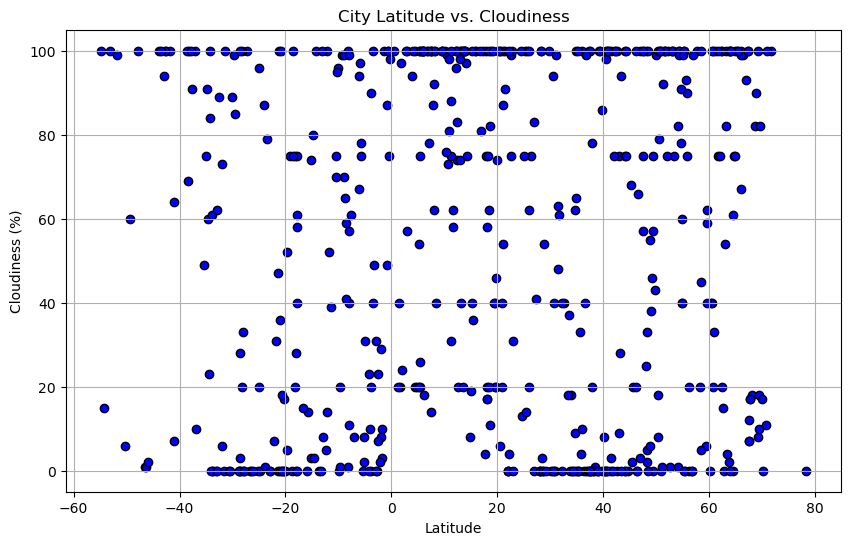

In [10]:
# data
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, cloudiness, marker='o', color='blue', edgecolor='black')

# Incorporate other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

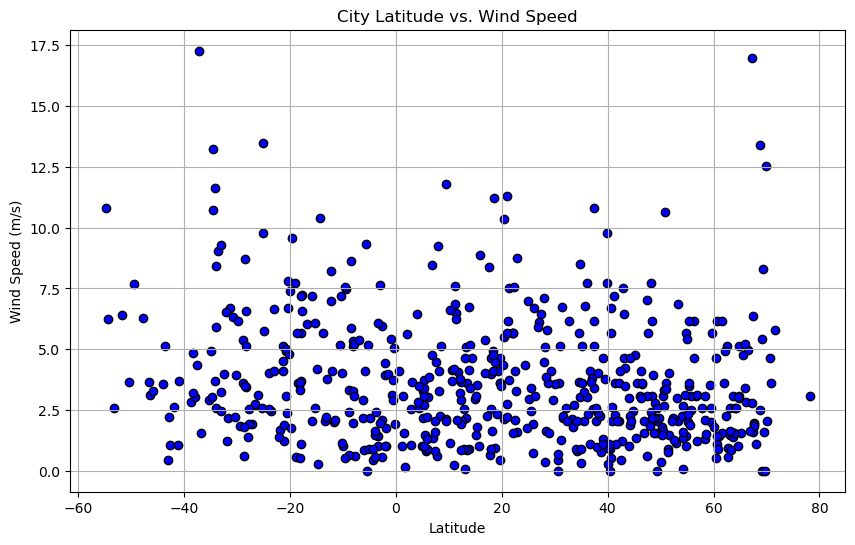

In [11]:
#  data
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, wind_speed, marker='o', color='blue', edgecolor='black')

# Incorporate other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title, file_name):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,18.58,91,100,3.60,US,1723167434
1,kourou,5.1552,-52.6478,25.51,88,54,3.27,GF,1723167435
3,vilyuchinsk,52.9306,158.4028,13.44,99,100,1.15,RU,1723167437
4,guerrero negro,27.9769,-114.0611,22.69,67,0,7.09,MX,1723167440
7,anadyr,64.7500,177.4833,8.89,70,75,3.00,RU,1723167443


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,-15.39,76,15,6.24,GS,1723167436
5,governador valadares,-18.8511,-41.9494,21.76,58,0,0.55,BR,1723167441
6,port-aux-francais,-49.3500,70.2167,2.39,71,60,7.68,TF,1723167442
9,waitangi,-43.9535,-176.5597,12.12,81,100,3.58,NZ,1723167446
12,adamstown,-25.0660,-130.1015,22.22,82,96,13.47,PN,1723167449


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4509660289516716


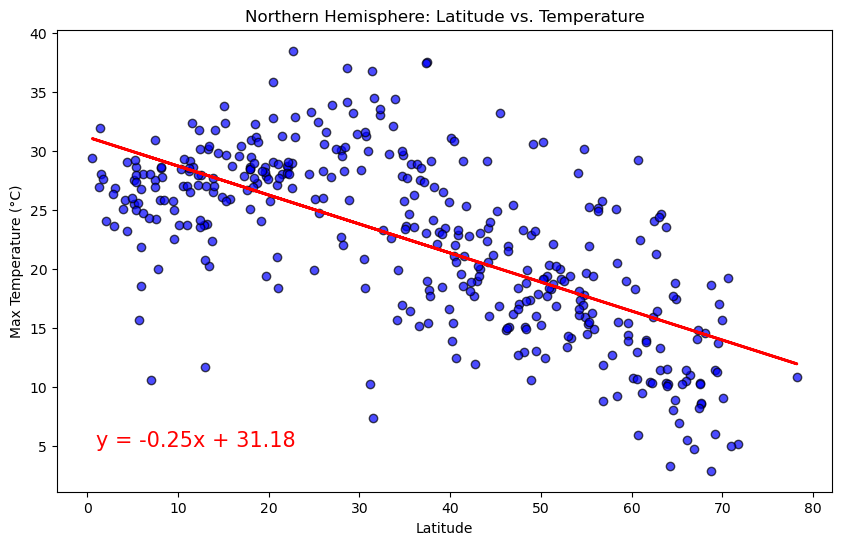

In [44]:
# Linear regression on Northern Hemisphere

latitude = northern_hemi_df["Lat"]
temperature = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, temperature)

# Calculate r-squared value
r_squared = r_value**2

# Print r-squared value
print(f"The r^2-value is: {r_squared}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, temperature, color='blue', edgecolor='black', alpha=0.7)

# Plot the linear regression line
plt.plot(latitude, intercept + slope * latitude, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Northern Hemisphere: Latitude vs. Temperature')


# Add the regression equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(1, 5, equation_text, color='red', fontsize=15)  


# Save the figure
plt.savefig('output_data/Northern_Hemisphere_Latitude_vs_Temperature.png')

# Show plot
plt.show()

The r^2-value is: 0.5983563237460876


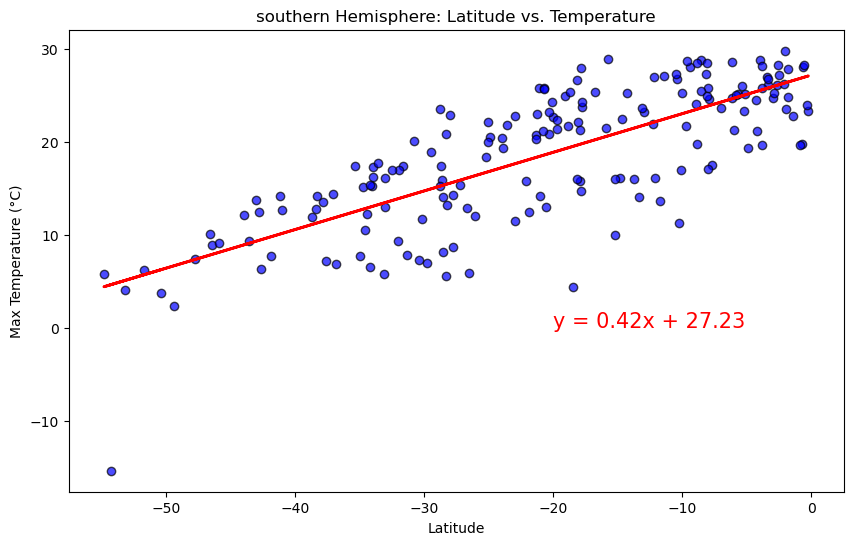

In [47]:
#  Linear regression on Southern Hemisphere
latitude = southern_hemi_df["Lat"]
temperature = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, temperature)

# Calculate r-squared value
r_squared = r_value**2

# Print r-squared value
print(f"The r^2-value is: {r_squared}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, temperature, color='blue', edgecolor='black', alpha=0.7)

# Plot the linear regression line
plt.plot(latitude, intercept + slope * latitude, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('southern Hemisphere: Latitude vs. Temperature')


# Add the regression equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(-20,0, equation_text, color='red', fontsize=15)  


# Save the figure
plt.savefig('output_data/southern_Hemisphere_Latitude_vs_Temperature.png')

# Show plot
plt.show()

** Discussion about the Linear Relationship 

- In the **Northern Hemisphere**, as you move away from the equator (higher latitude), the temperature generally gets lower. The relationship is moderately strong, as indicated by the R-squared value of about 0.46.
- In the **Southern Hemisphere**, as you move closer to the equator (lower latitude), the temperature generally gets higher. The relationship here is slightly stronger, with an R-squared value of about 0.60.


### Humidity vs. Latitude Linear Regression Plot

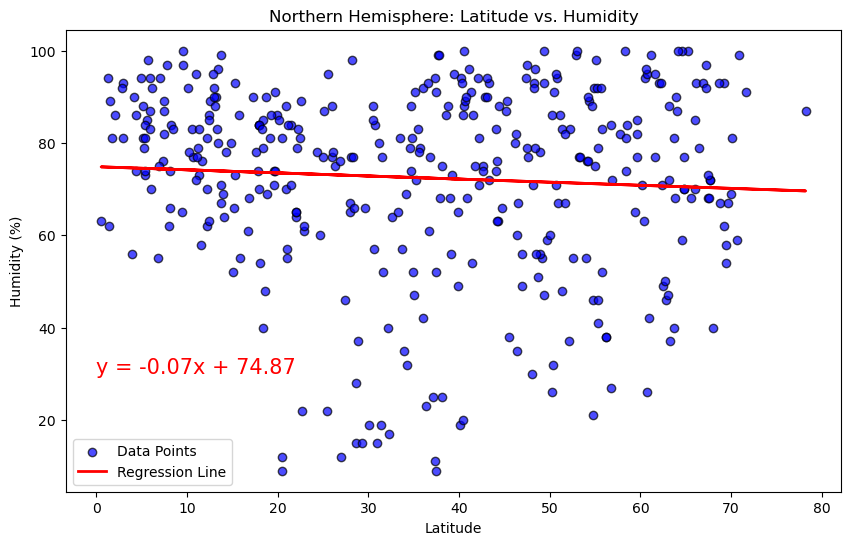

The r^2-value is: 0.0042053349


In [32]:
# Northern Hemisphere
# Prepare data for Latitude vs. Humidity
latitude = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, humidity)
regression_line = slope * latitude + intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, humidity, color='blue', edgecolor='black', alpha=0.7, label='Data Points')
plt.plot(latitude, regression_line, color='red', linewidth=2, label='Regression Line')



# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Latitude vs. Humidity')
plt.legend()

# Add the regression equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0,30, equation_text, color='red', fontsize=15)  



# Save the figure
plt.savefig('output_data/Northern_Hemisphere_Latitude_vs_Humidity.png')

# Show plot
plt.show()

# Print the r^2 value
print(f"The r^2-value is: {r_value**2:.10f}")


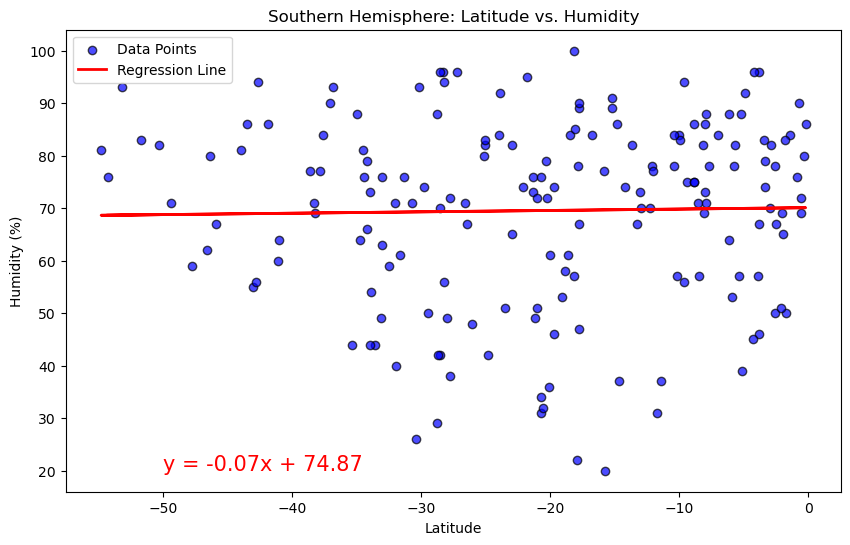

The r^2-value is: 0.0004264198


In [36]:
# Southern Hemisphere
# Prepare data for Latitude vs. Humidity in the Southern Hemisphere
latitude_south = southern_hemi_df["Lat"]
humidity_south = southern_hemi_df["Humidity"]

# Perform linear regression
slope_south, intercept_south, r_value_south, p_value_south, std_err_south = linregress(latitude_south, humidity_south)
regression_line_south = slope_south * latitude_south + intercept_south

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude_south, humidity_south, color='blue', edgecolor='black', alpha=0.7, label='Data Points')
plt.plot(latitude_south, regression_line_south, color='red', linewidth=2, label='Regression Line')


# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Latitude vs. Humidity')
plt.legend()

# Add the regression equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(-50,20, equation_text, color='red', fontsize=15)  


# Save the figure
plt.savefig('output_data/Southern_Hemisphere_Latitude_vs_Humidity.png')

# Show plot
plt.show()

# Print the r^2 value
print(f"The r^2-value is: {r_value_south**2:.10f}")

** Discussion about the Linear Relationship 

- In both the **Northern** and **Southern Hemispheres**, the slope is almost flat, which means latitude has little to no effect on humidity levels.
- **R-squared values** are very low (close to 0), indicating that latitude does not explain the variation in humidity. Other factors, like local weather patterns or geographic features, are more important in determining humidity.



### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.017033479071928002


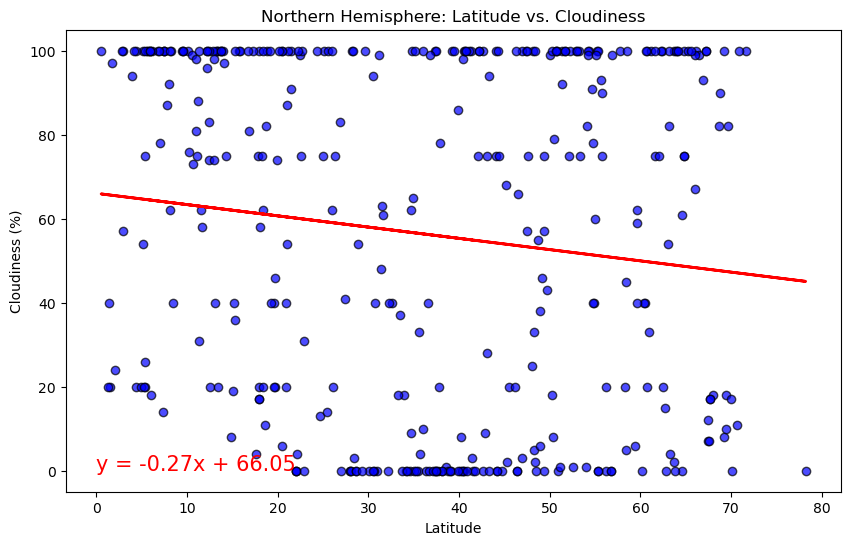

In [37]:
# Northern Hemisphere
# Prepare data for Cloudiness vs. Latitude
latitude = northern_hemi_df["Lat"]
cloudiness = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, cloudiness)

# Calculate r-squared value
r_squared = r_value**2

# Print r-squared value
print(f"The r^2-value is: {r_squared}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, cloudiness, color='blue', edgecolor='black', alpha=0.7)

# Plot the linear regression line
plt.plot(latitude, intercept + slope * latitude, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness')
 

 # Add the regression equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0,0, equation_text, color='red', fontsize=15)  


# Save the figure
plt.savefig('output_data/Northern_Hemisphere_Latitude_vs_Cloudiness.png')

# Show plot
plt.show()

The r^2-value is: 0.010889767211311338


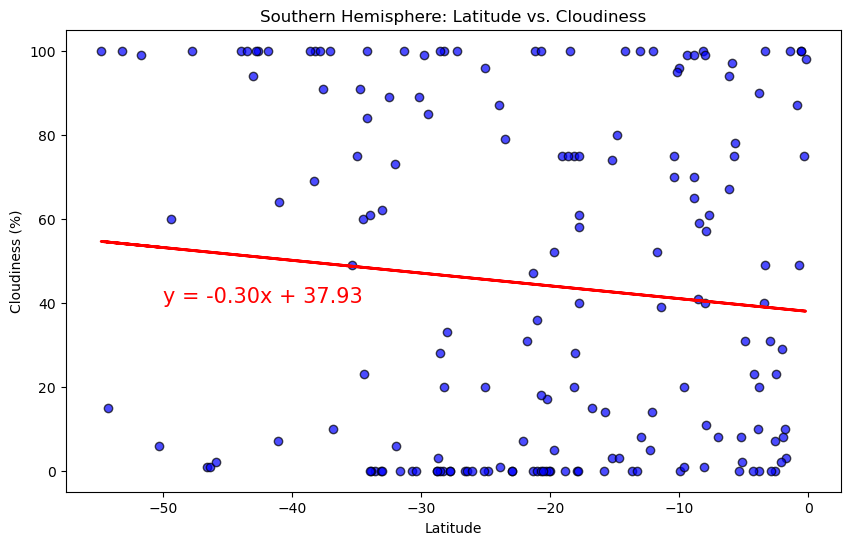

In [38]:
# Southern Hemisphere
# Prepare data for Cloudiness vs. Latitude
latitude = southern_hemi_df["Lat"]
cloudiness = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, cloudiness)

# Calculate r-squared value
r_squared = r_value**2

# Print r-squared value
print(f"The r^2-value is: {r_squared}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, cloudiness, color='blue', edgecolor='black', alpha=0.7)

# Plot the linear regression line
plt.plot(latitude, intercept + slope * latitude, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness')

# Add the regression equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(-50,40, equation_text, color='red', fontsize=15)  

# Save the figure
plt.savefig('output_data/Southern_Hemisphere_Latitude_vs_Cloudiness.png')

# Show plot
plt.show()

** Discussion about the Linear Relationship 

- In both the **Northern** and **Southern Hemispheres**, the slope is very small and negative, meaning there's a slight decrease in cloudiness as latitude increases. However, this decrease is almost negligible.
- **R-squared values** are very low (close to 0), which indicates that latitude does not have a significant effect on cloudiness. Other factors are more likely influencing cloudiness levels.



### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0024333209510578233


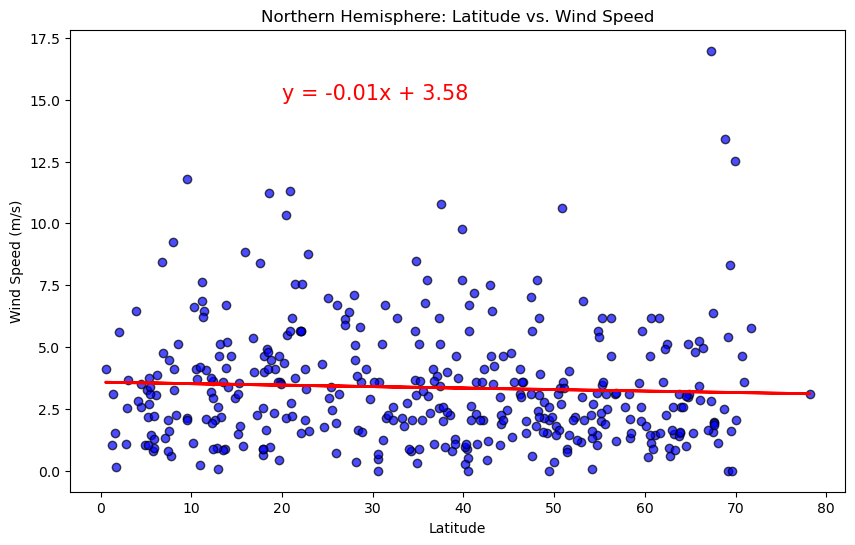

In [39]:
# north Hemisphere

# Prepare data for Wind Speed vs. Latitude
latitude = northern_hemi_df["Lat"]
wind_speed = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, wind_speed)

# Calculate r-squared value
r_squared = r_value**2

# Print r-squared value
print(f"The r^2-value is: {r_squared}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, wind_speed, color='blue', edgecolor='black', alpha=0.7)

# Plot the linear regression line
plt.plot(latitude, intercept + slope * latitude, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed')


# Add the regression equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(20,15, equation_text, color='red', fontsize=15)  


# Save the figure
plt.savefig('output_data/Northern_Hemisphere_Latitude_vs_Wind_Speed.png')

# Show plot
plt.show()

The r^2-value is: 0.03996818286991501


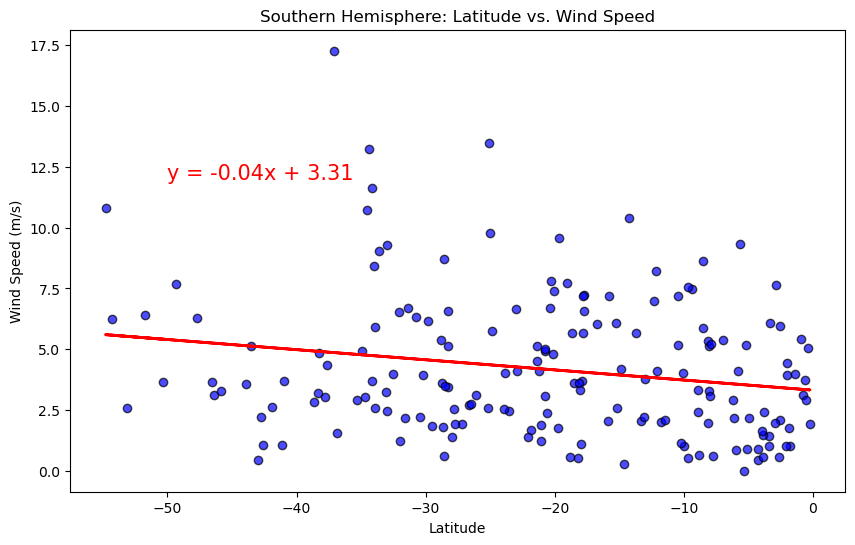

In [43]:
# Southern Hemisphere
latitude = southern_hemi_df["Lat"]
wind_speed = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, wind_speed)

# Calculate r-squared value
r_squared = r_value**2

# Print r-squared value
print(f"The r^2-value is: {r_squared}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitude, wind_speed, color='blue', edgecolor='black', alpha=0.7)

# Plot the linear regression line
plt.plot(latitude, intercept + slope * latitude, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed')

# Add the regression equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(-50,12, equation_text, color='red', fontsize=15)  



plt.savefig('output_data/Southern_Hemisphere_Latitude_vs_Wind_Speed.png')

# Show plot
plt.show()

**### Discussion about the Linear Relationship 

- In both the **Northern** and **Southern Hemispheres**, the slope is very small and close to zero, meaning there's almost no relationship between latitude and wind speed.
- **R-squared values** are very low, which indicates that latitude does not significantly affect wind speed. Other factors are likely more important in determining wind speeds.

